<a href="https://colab.research.google.com/github/jessietian19/2-HAD5016-S26/blob/main/Copy_of_Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Necessary Libraries



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import io
import seaborn as sns #
import matplotlib.pyplot as plt #plot
uploaded = files.upload()

Saving Datathon_1_Dataset_1.csv to Datathon_1_Dataset_1.csv


### 2. Load Data

In [ ]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Datathon_1_Dataset_1.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

# Getting the shape of the dataframe, how many rows and columns
print(df.shape)

# List the columns of the dataframe
print(df.columns)

# Check for missing values in each column
print(df.isna().sum())

(1465, 13)
Index(['id', 'age', 'sex', 'air_pm25', 'alcohol', 'genetic_risk',
       'history_lungcnd', 'bmi', 'smoke_packyrs', 'smoke_passive',
       'history_chestpain', 'history_hemoptysis', 'severity'],
      dtype='object')
id                    0
age                   0
sex                   0
air_pm25              0
alcohol               0
genetic_risk          0
history_lungcnd       0
bmi                   0
smoke_packyrs         0
smoke_passive         0
history_chestpain     0
history_hemoptysis    0
severity              0
dtype: int64


### 3. Preprocessing Data / data cleaning



In [ ]:

# Preprocess the data
# Encoding 'severity' column into separte 'lung_cancer' variable where
# lambda function are anonymous, simple, one-time operations and good for use as inline arguments
df['lung_cancer'] = df['severity'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
# display(df.head())
# print(df.columns)
# print(df.shape)

# sns.boxplot(df['genetic_risk'])
# plt.show()

# Display value counts of the new encoded column
# 1,162 lung cancer patients & 303 healthy individuals, which matches dataset information of assigment page
print(df['lung_cancer'].value_counts())

# Split data into features and label

X = df[['genetic_risk', 'smoke_passive', 'alcohol']]
y = df['lung_cancer']

# Split data into training and testing sets
# For smaller dataset, we split 70% for training 30% for test
# random_state set as we want to make randomization reproducable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Overall class proportion:\n", y.value_counts(normalize=True))
print("Train class proportion:\n", y_train.value_counts(normalize=True))
print("Test class proportion:\n", y_test.value_counts(normalize=True))


# # Scale the features
# # so mean of data is 0, sd = 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # learning distribution of cont variables, fit means learning parameters and applying parameters
X_test = scaler.transform(X_test) #apply only the parameters, best practice so that nothing from test set is used in training set

for k in range(1,32,2)
  knn=KNeighborsClassifier(n_neighbors=k, weights="distance")
  knn.fit(X_tra)




lung_cancer
1    1162
0     303
Name: count, dtype: int64
Overall class proportion:
 lung_cancer
1    0.793174
0    0.206826
Name: proportion, dtype: float64
Train class proportion:
 lung_cancer
1    0.793171
0    0.206829
Name: proportion, dtype: float64
Test class proportion:
 lung_cancer
1    0.793182
0    0.206818
Name: proportion, dtype: float64


### 4. Apply KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

# # Apply KNN
# # initialization: specify K
knn =  KNeighborsClassifier(n_neighbors=5, weights="distance")  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# # Predict using the test data
y_pred = knn.predict(X_test)

# Prediction percentages (what the model predicted)
import pandas as pd
pred_counts = pd.Series(y_pred).value_counts()
pred_perc = pd.Series(y_pred).value_counts(normalize=True) * 100
print("Predicted counts:\n", pred_counts)
print("Predicted percentages (%):\n", pred_perc.round(2))

# Evaluate the model (accuracy etc.)
print("Accuracy (%):", round(accuracy_score(y_test, y_pred) * 100, 2))
print("Balanced accuracy (%):", round(balanced_accuracy_score(y_test, y_pred) * 100, 2))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


Predicted counts:
 1    359
0     81
Name: count, dtype: int64
Predicted percentages (%):
 1    81.59
0    18.41
Name: proportion, dtype: float64
Accuracy (%): 83.64
Balanced accuracy (%): 73.03
[[ 50  41]
 [ 31 318]]
              precision    recall  f1-score   support

           0      0.617     0.549     0.581        91
           1      0.886     0.911     0.898       349

    accuracy                          0.836       440
   macro avg      0.752     0.730     0.740       440
weighted avg      0.830     0.836     0.833       440



### 5. Evaluate Model

In [ ]:
# # Evaluate the model
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

2.3c - Visualization of KNN Results Using a Confusion Matrix Heatmap

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get unique classes
# classes = [0,1] #lung_cancer is binary: 0=healthy, 1=cancer

# # Plotting the confusion matrix
# plt.figure(figsize=(7,5))
# sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix (lung_cancer)')
# plt.show()

### 6. Description statistic

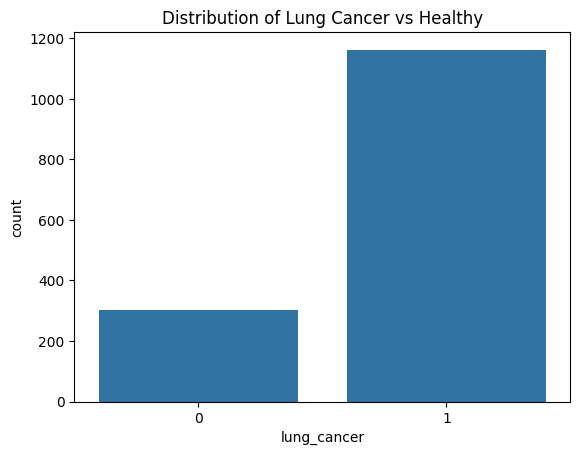

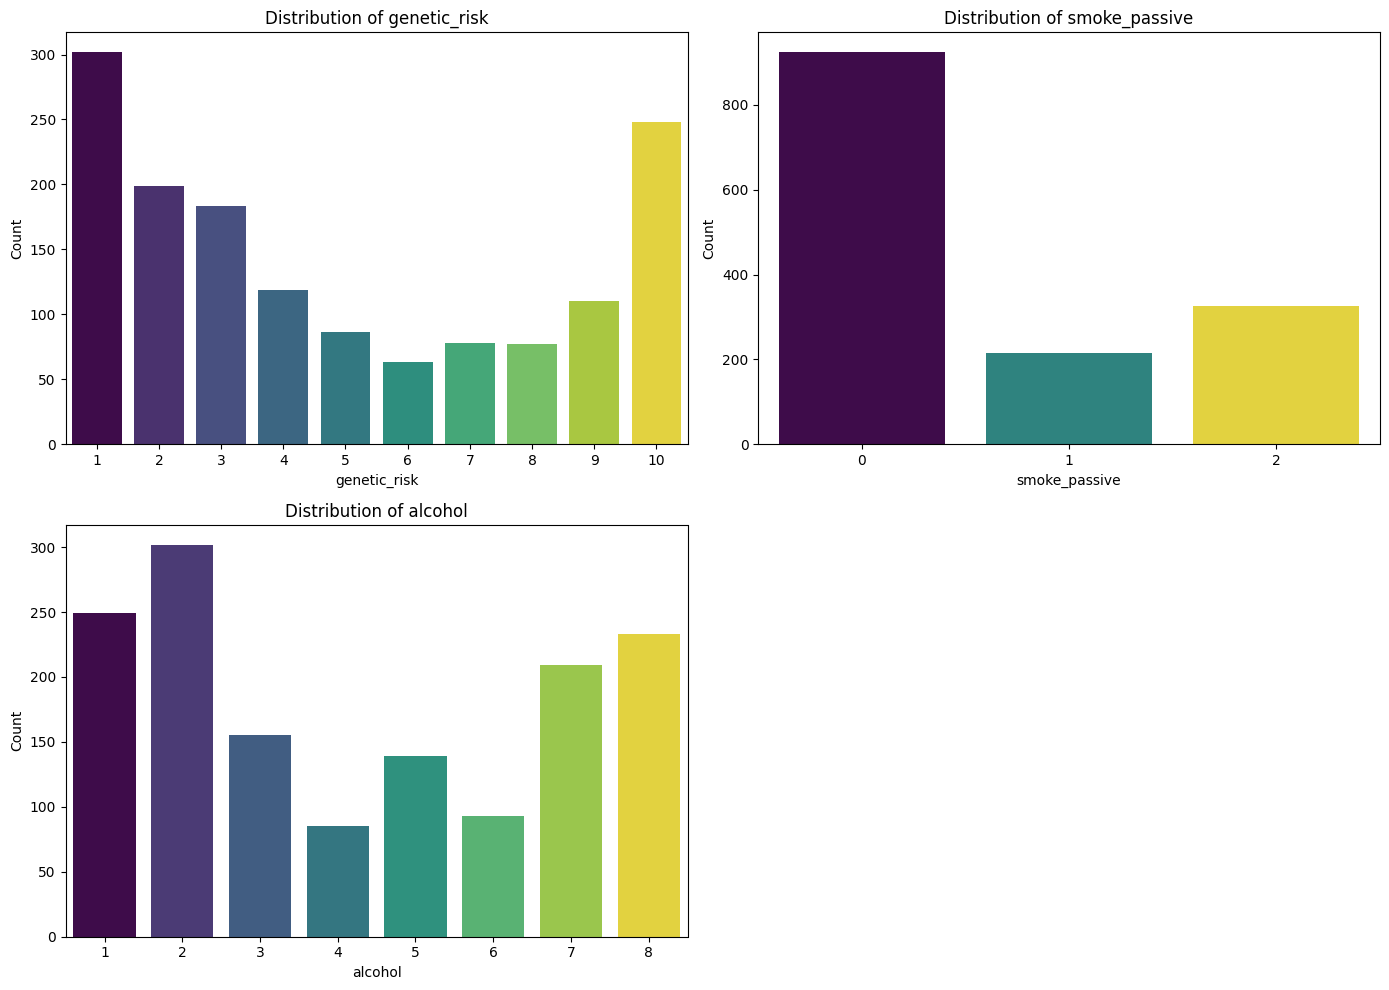

In [ ]:
# Check the balance of the target
sns.countplot(x=df['lung_cancer'])
plt.title("Distribution of Lung Cancer vs Healthy")
plt.show()

# Distribution of data
columns_to_plot = ['genetic_risk', 'smoke_passive', 'alcohol']# Select colums
plt.figure(figsize=(14, 10))# multiple subplots

for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df[col], hue=df[col], palette='viridis', legend=False)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()